# INF 5520 Mandatory term project 2021 - part II

# Feature evaluation and classification


In this mandatory exercise you are going to implement a multivariate Gaussian classifier and use it to classifiy images with 4 different texture classes. You must implement your own classifier, but you are allowed to use library functions to invert matrixes, compute the determinant, and compute the mean vector and the covariance matrix for each class. It is recommended that you use an environment where you have access to a numerically stable library function for matrix inversion (for example Matlab).

The exercise combines feature evaluation, classifier implementation, training a classifier, testing different feature combinations and evaluating classifier performance.

### Submission through notebook
If you submit using a Jupyter notebook, you notebook MUST contain discussion of the required aspect, figures, code, and discussion of what the figures show. Create a zip-file of all materials and check that it displays correctly if downloaded from a differnet directory.  The format of the text should be like what you find in a techinical report.

### Time table:
• Exercise and images available: Monday October 19, 2020
• Deadline for Part II:  Monday November 9, 2020

### Submission:
Your solution should be submitted as a single PDF file contraining the problem descrition, discussion, and supporting source code. The files should be compressed (.zip or .tar) in a folder names YOURUSERNAME_PARTII.zip/tar and upload it through the devilry system (devilry.ifi.uio.no) before the deadline above. Questions about the submission can be directed to the group teacher.

If you submit a notebook, you do not need to include all the original texture images, but make sure to include any result figures or illustions on .png-format.

### Evaluation:
Since image processing is a field where solutions often are found by experimenting
with different methods, we would like to emphasize the following point: You will be
credited for analyzing the problem and the input images so you can select suitable
methods and features. You will not be credited for testing all available
methods/features, even if it is a huge amount of work. Analysis and discussion, of
both input and output, are very important. Please note that both mandatory exercises must be passed in order to take the exam.

### How to work
The exercise is an individual work, and each student should deliver a written report. Your report should be genuine, in particular we will check that each report provides its own discussion of all method and parameter choices. Include references if you use external sources.
The report should contain the description of the problem, theory, chosen methods, results and algorithms used. You have to document all steps in the algorithms, and listings of our own code should be included as appendix. The code for your classification algorithm should be listed in your report.
Remark: Part II is not linked directly to part I, so you will work on new feature images. These will be input to multivariate classification, not thresholded as in part I. 

### The image data set

#### Python comment: png-version of the dataset is found under …/undervisningsmateriale/mandatory2/oblig2-python.zip
Note that the png-format does not handle the scaling of the glcm-images well, thus we work either directly by reading matlab-files or text/ascii-files into python.

You have available a separate training data set and a test data set of three original images and a set of precomputed GLCM matrices computed from the training image.
The images can be found under …/undervisningsmateriale/mandatory2/oblig2_python.zip . 

(File extention .txt for text files)
Training data set:
mosaic1_train.mat
training_mask.mat
                                                                 For each texture: 
texture1_glcmdx0dymin1.mat	 	Angle 90 degrees x, y-1
texture1_glcmdxplus1dy0.mat                 Angle 0     x+1,y
texture1_glcmdxplus1dymin1.mat          Angle 45 x+1,y-1
  texture1_glcmdxmin1dymin1.mat           Angle 135 x-1,y-1
texture2_glcmdx0dymin1.mat            .
texture2_glcmdxplus1dy0.mat
texture2_glcmdxplus1dymin1.mat
texture2_glcmdxmin1dymin1.mat
texture3_glcmdx0dymin1.mat
texture3_glcmdxplus1dy0.mat
texture3_glcmdxplus1dymin1.mat
texture3_glcmdxmin1dymin1.mat
texture4_glcmdx0dymin1.mat
texture4_glcmdxplus1dy0.mat
texture4_glcmdxplus1dymin1.mat
texture4_glcmdxmin1dymin1.mat

Test data set:
mosaic2_test.mat with mask mask_mosaic2_test.mat 
mosaic3_test.mat with mask mask_mosaic3_test.mat

### Task overview

The task has the following steps
1. Choosing glcm images to work with.
2. Discussing new features by subdividing the GLCM matrices
3. Selecting and implementing the best features from the GLCM matrices
4. Implementing a Gaussian classifier
5. Training the classifier on the chosen features
6. Classifying the test images. Compute the classification accuracy and           confusion matrices and discuss the performance of the classification

Your report should contain one section for each of these 6 tasks. 



## 1. Choosing GLCM images to work with


mosaic1_train.mat contains 4 differenttextures (texture1,…texture4). A subimage of each texture was used to precompute GLCM matrices as you did in Part I. GLCM matrices with distances $(\Delta x=1,\Delta y=0), (\Delta x=0, \Delta y=-1), (\Delta x=1, \Delta y=-1) and (\Delta x=-1, \Delta y=-1)$ for each texture, and G=16. These GLCM images are given above. 
Analyze the GLCM matrices given and select maximum two directions that you expect to be useful for discriminating the textures. Discuss if you need one or two directions, and discuss which directions you think have most information. 

Your answer should contain both a discussion and figures to support you discussion. 

(512, 512)


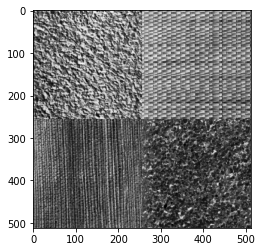

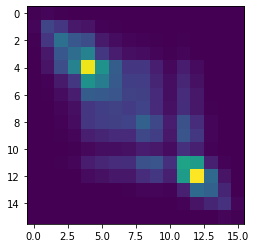

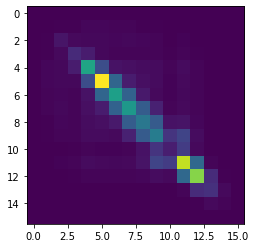

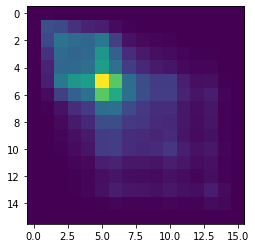

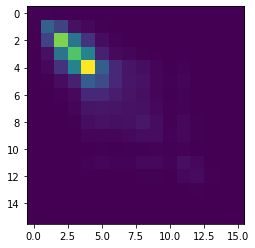

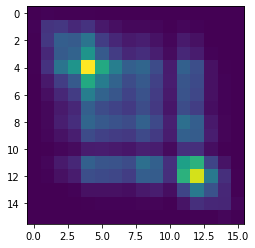

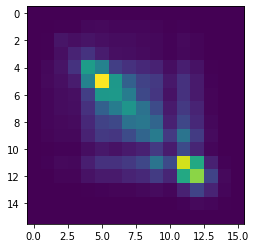

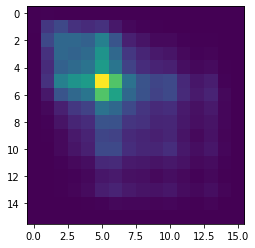

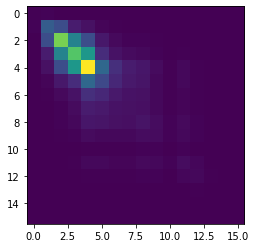

In [178]:
# loading of matlab files in python using scipy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html
from scipy.io import loadmat
# or numpy.loadtxt
# https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html
import numpy as np
import matplotlib.pyplot as plt

# Load mosaic1
img = np.loadtxt('mosaic1_train.txt', delimiter=',')

# Load mosaic2_test
img_test1 = np.loadtxt('mosaic2_test.txt', delimiter=',')

# Load mosaic3_test
img_test2 = np.loadtxt('mosaic3_test.txt', delimiter=',')

plt.figure()
plt.imshow(img, cmap='gray')

# Training mask
mask = np.loadtxt('training_mask.txt', delimiter=',')
print(mask.shape)  # (512, 512)

# Load dx0dymin1
glcms1 = []
for i in range(1, 5):
    glcms1.append(np.loadtxt('texture%ddx0dymin1.txt' % (i), delimiter=','))
    
# Load dx1dy0 --
glcms2 = []
for i in range(1, 5):
    glcms2.append(np.loadtxt('texture%ddx1dy0.txt' % (i), delimiter=','))
    
# Load dx1dymin1 --
glcms3 = []
for i in range(1, 5):
    glcms3.append(np.loadtxt('texture%ddx1dymin1.txt' % (i), delimiter=','))
    
# Load dxmin1dymin1
glcms4 = []
for i in range(1, 5):
    glcms4.append(np.loadtxt('texture%ddxmin1dymin1.txt' % (i), delimiter=','))

# Plot dx1dy0 GLCMs
for i in range(len(glcms1)):
    plt.figure()
    plt.imshow(glcms2[i])

# Plot dx1dymin1 GLCMs
for i in range(len(glcms3)):
    plt.figure()
    plt.imshow(glcms3[i])
    
# With glcms4 textures 3 and 4 are distinguishable but 1 and 2 are similar
# glcms 2 seems to have the most distinguishable glcm between textures 1 and 2
# Therefore dxmin1dymin1 and dx1dy0 seem like a good combination for best distinguishability



## 2. Discussing new features by subdividing the GLCM matrices

In this exercise you should NOT use any of the GLCM features from the lectures, but
implement your own features that are based on only parts of the GLCM matrices, not the entire matrix. Divide the 16x16 GLCM (G=16) matrix into four quadrants Q1, Q2, Q3 and Q4 of the same size. Create new features by summing the amount of energy/percentage of gray level transitions found in each quadrant, e.g.

\begin{align}
Q1=\frac{\sum_{i=1}^{8}\sum_{j=1}^{8}P(i,j)}{\sum_{i=1}^{G}\sum_{j=1}^{G}P(i,j)} 
\end{align}

\begin{align}
Q2=\frac{\sum_{i=1}^{8}\sum_{j=9}^{G}P(i,j)}{\sum_{i=1}^{G}\sum_{j=1}^{G}P(i,j)} 
\end{align}
 
Features Q3 and Q4 should be computed correspondingly.

Based on just visual inspection of the selected GLCM matrices, discuss if you think all four textures can be separated with these features. If you do not think the textures can be separated using a subdivision into 4 quadrants, you can subdivide ONE of the quadrants into 4 smaller quadrants of equal size. If you choose to do this, discuss which quadrant you should subdivide.

How many quadrants do you need do discriminate between the four textures? 


In [ ]:
# We have 8 total glcms, each one divided into 4 quadrants containing 8x8 GLCMs
temp = np.concatenate((glcms2, glcms4))
glcm_quandrants = np.zeros((8, 4, 8, 8))
quad_div = np.zeros((8, 4, 4, 4)) #quadrants of second quadtrant

interm = np.zeros((1, 8, 16, 16))
interm2 = np.zeros((1, 8, 8, 8)) # Intermediate for quadtrant of second quadtrant

interm[0] =  np.array(glcms2 + glcms4)

glcm_quadtrants = tile(interm)[0]
interm2[0] = glcm_quadtrants[:, 1]
quad_div = tile(interm)[0]

#For each subdivision of the glcm, we have a scalar value       
features = np.zeros((8, 4))
sub_features = np.zeros((8, 4))

for i in range(features.shape[0]):
    for j in range(features.shape[1]):
        features[i, j] = np.sum(glcm_quadtrants[i, j]) / np.sum(temp[i])
        

x = [1, 2, 3, 4] #Quadrants

#print(features.shape)
plt.figure()
plt.scatter(x, features[0], color='red')
plt.scatter(x, features[1], color='blue')
plt.scatter(x, features[2], color='green')
plt.scatter(x, features[3], color='yellow')
plt.scatter(x, features[4], color='cyan')
plt.scatter(x, features[5], color='black')
plt.scatter(x, features[6], color='brown')
plt.scatter(x, features[7], color='purple')

#Quadrants two and three are not very seperable
#Try subdividing quadrant 2

##  3. Selecting and implementing a subset of these features

Implement the features chosen in step 2 using sliding windows of size 31x31, G=16, and the direction(s) you chose. Consider all your features but discuss if you will need all of them in the classification. Select some of the features and include the corresponding feature images computed from mosaic1_train.mat in your report.

Your answer must contain code, discussion, and figures. 

In [2]:
from skimage.feature import graycomatrix

#This is the function that takes care of the sliding window
def img_transform(img, minimum=0, maximum=255, levels=8):
    bins = np.linspace(minimum, maximum+1, levels+1)
    transformed_img = np.digitize(img, bins) - 1
    return transformed_img

def glcm(img, window_size=5, distance=1, angle=0.0, levels=8):
    # Reduce the number of gray-levels to specified value
    img = img_transform(img, levels=levels)
    i, j = img.shape

    #Output will have a seperate GLCM for every pixel of dimension (levels, levels)
    full_glcm = np.zeros((i, j, levels, levels))
    for row in range(0, i):
        for col in range(0, j):
            i_offset = i - (row + window_size)
            j_offset = j - (col + window_size)
            # The indecies are mirrored when out of bounds
            if row + window_size > i and col + window_size > j:
                seg = img[row :, col :]
                #Add the row i
                seg = np.concatenate((seg, img[i_offset:, col : col + (window_size - 1 - j_offset)][::-1, ::]), axis=0)
                #Add the col j
                seg = np.concatenate((seg, img[row + i_offset:, j_offset:][::,::-1]), axis=1)
            elif row + window_size > i:
                seg = img[row :, col : col + (window_size - 1)]
                seg = np.concatenate((seg, img[i_offset:, col : col + (window_size - 1)][::-1, ::]), axis=0)
            elif col + window_size > j:
                seg = img[row : row + (window_size - 1) :, col :]
                seg = np.concatenate((seg, img[row : row + (window_size - 1), j_offset:][::,::-1]), axis=1)
            else:
                seg = img[row : row + (window_size - 1), col : col + (window_size - 1)]
            #Calculate the GLCM for the given pixel based on the segmented region
            sub_glcm = glcm_sub(seg, distance=distance, angle=angle, levels=levels)
            full_glcm[row, col] = sub_glcm
    return full_glcm

# Calculates the GLCM
def glcm_sub(img, distance=1, angle=0.0, levels=8):
    G = graycomatrix(img, levels=levels, distances=[distance], angles=[angle], symmetric=True, normed=True)[:,:,0,0]    
    return G/np.sum(G)

def tile(mat):
    mat_size = mat.shape[-1]
    nrows = ncols = mat_size//2
    res = np.zeros((mat.shape[0], mat.shape[1], 4, mat_size//2, mat_size//2))
    
    for i in range(0, mat.shape[0]):
            for j in range(0, mat.shape[1]):
                res[i, j] = (mat[i,j].reshape(mat_size//nrows, nrows, -1, ncols).swapaxes(1, 2).reshape(-1, nrows, ncols))
    return res
                
def compute_Q(glcm): # i, j, 16, 16
    glcm_dim = glcm.shape[2]
    sub_glcms = tile(glcm) # i, j, 4, 8, 8
    quad_div_num = 0
    quad_tiles = tile(sub_glcms[:,:,quad_div_num,:,:]) #divinding the first quadtrant
    
    vals = np.zeros((glcm.shape[0], glcm.shape[1], 4))
    sub_vals = np.zeros((glcm.shape[0], glcm.shape[1], 4))
    for i in range(glcm.shape[0]):
        for j in range(glcm.shape[1]):
            s = np.sum(glcm[i, j])
            for k in range(4):
                vals[i, j, k] = np.sum(sub_glcms[i, j, k])  /  s
                sub_vals[i, j, k] = np.sum(quad_tiles[i, j, k]) / s
    vals = np.delete(vals, quad_div_num, axis=2)

    return np.concatenate((vals, sub_vals), axis=2)

In [3]:
g2 = glcm(img, distance=1, angle=0.0, levels=16, window_size=29) #dx=3 best so far
g4 = glcm(img, distance=3, angle=45.0, levels=16, window_size=29)

features1 = compute_Q(g2)
features2 = compute_Q(g4)

In [ ]:
# Construct array containing the classified areas for each of the features for each class

vis_feat2 = [[features2[:,:,j][mask==i] for i in range(len(np.unique(mask)))] for j in range(7)]
vis_feat1 = [[features1[:,:,j][mask==i] for i in range(len(np.unique(mask)))] for j in range(7)]

print('Feature set 1')
plt.figure() #0 5 2 6
for i in range(7): # features
    for j in range(5): # classes
        plt.plot(vis_feat2[i][j])
    plt.show()
    
print('Feature set 2')
plt.figure() #0 5 2 6
for i in range(7): # features
    for j in range(5): # classes
        plt.plot(vis_feat1[i][j])
    plt.show()

## 4. Implement a multivariate Gaussian classifier

The classifier can and should use library functions for matrix inversion and computing the determinant. If you want, you can use library functions for estimating the mean vector and the covariance matrix. However, you must implement the computation of the posterior probability using Bayes rule yourself. Include the classifier code below.  

In [173]:
# 5, 1, 12, 8, 
import numpy as np
import scipy as sp
import sklearn.metrics as skm
import pandas as pd
import seaborn as sns

class bayesianModel():
    def __init__(self):
        self.mean_vecs = [] # Mean values for each class
        self.cov_mats = []  # Standard deviation for each class
        self.c_priors = [0.1e-7, 0.25-(0.1e-7/4),  0.25-(0.1e-7/4),  
                         0.25-(0.1e-7/4),  0.25-(0.1e-7/4)]   # Class prior probability
        self.class_num = 0  # Number of classes
        self.accuracy = 0   # Accuracy from last training
        self.cm = 0         # Confusion matrix
        self.probabilities = 0
        
        self.x = None       # Last training input
        self.y = None       # Last training true values
        self.preds = None

    # Gaussian distribution P(X | Y) * P(Y)
    def gauss(self, X, mean_vec, cov_mat, prior):
        k = X.shape[0]; m = np.matrix(X-mean_vec)
        return ((1/( (2*np.pi)**0.5*sp.linalg.det(cov_mat)**0.5)) \
                * np.exp(-0.5*(X-mean_vec)@sp.linalg.inv(cov_mat)@(X-mean_vec).T)) * prior
        
    def softmax(self, x):
        return x/sum(x)
    
    # Predict for each pixel
    def predict(self, x):
        self.probabilities = np.zeros((x.shape[0], x.shape[1], self.class_num))
        preds = np.zeros((x.shape[0], x.shape[1])).astype(int)
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                norm_vals = ([self.gauss(x[i, j], self.mean_vecs[c], self.cov_mats[c], 
                                         self.c_priors[c]) for c in range(self.class_num)])
                preds[i, j] = np.argmax(norm_vals)
                self.probabilities[i, j] = norm_vals
                #print(self.softmax(norm_vals))
        self.accuracy = self.get_accuracy(preds, self.y)
        self.cm = self.get_confusion__mat(preds, self.y)
        self.preds = preds
        return preds

    def get_accuracy(self, y_pred, y):
        return np.mean(y_pred[y!=0] == y[y!=0]) #accuracy excluding the zero label
        #return np.mean(y_pred == y)
        
    def get_confusion__mat(self, y_pred, y):
        return skm.confusion_matrix(y[y!=0].flatten(), y_pred[y!=0].flatten())
    
    def plot_confusion_mat(self):
        if self.cm.shape == (4, 4):
            rows = [i for i in range(1, self.cm.shape[0] + 1)]
            col = [i for i in range(1, self.cm.shape[1] + 1)]
        else:
            rows = [i for i in range(self.cm.shape[0])]
            col = [i for i in range(self.cm.shape[1])]

        cm_df = pd.DataFrame(self.cm, index = rows, columns = col)
        
        plt.figure(figsize=(5,5))
        sns.heatmap(cm_df, annot=True, fmt='g')
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()

    # Train the classifier
    def fit(self, x, y):
        self.x = x; self.y = y
        self.class_num = len(np.unique(y))
        #Mean-value vector for each feature f calcualted for each class c
        self.mean_vecs = [np.mean(x[y==i], axis=(0, 1)) for i in range(self.class_num)]
        #Covariance matrix from all features f calculated for each class c
        self.cov_mats = [np.cov(x[y==i], rowvar=False) for i in range(self.class_num)]
        #self.c_priors = np.array([y[y==i].shape[0] for i in range(self.class_num)]) / (y[y!=0].flatten().shape[0])

In [177]:
# Combines multiple gaussian models and predicts the class from the most confident
class oneVsRest():
    def __init__(self, sub_classifiers):
        self.sub_classifiers = sub_classifiers
        self.num_class = sub_classifiers[0].class_num
        self.dims = sub_classifiers[0].y.shape
        self.accuracy = 0
        self.cm = 0 # Confusion matrix
        self.predictions = 0
        self.y = sub_classifiers[0].y
        
    def predict(self):
        preds = np.zeros(self.dims)
        for i in range(self.dims[0]):
            for j in range(self.dims[0]):
                probs = [k.probabilities[i,j] for k in self.sub_classifiers]
                most_confident = np.argmax([max(i) for i in probs])
                preds[i, j] = np.argmax(probs[most_confident])
        self.accuracy = self.get_accuracy(preds, self.y)
        self.cm = self.get_confusion__mat(preds, self.y)
        return preds
    
    def get_accuracy(self, y_pred, y):
        return np.mean(y_pred[y!=0] == y[y!=0]) #accuracy excluding the zero label
        #return np.mean(y_pred == y)
        
    def get_confusion__mat(self, y_pred, y):
        return skm.confusion_matrix(y[y!=0].flatten(), y_pred[y!=0].flatten())
    
    def plot_confusion_mat(self):
        if self.cm.shape == (4, 4):
            rows = [i for i in range(1, self.cm.shape[0] + 1)]
            col = [i for i in range(1, self.cm.shape[1] + 1)]
        else:
            rows = [i for i in range(self.cm.shape[0])]
            col = [i for i in range(self.cm.shape[1])]

        cm_df = pd.DataFrame(self.cm, index = rows, columns = col)
        
        plt.figure(figsize=(5,5))
        sns.heatmap(cm_df, annot=True, fmt='g')
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()

## 5. Training the classifier based on the feature subset from point 3. 

Compute the overall classification accuracy and the full confusion matrix based on the training data. Discuss the performance, what does the confusion matrix show?
(Hint: if you run into a singular covariance matrix using a certain combination of features, there might be a reason for that. Try to understand why. If you don’t run into singular matrices you feature selection has avoided this little “trap”.)

Include the results and discussion below.


I first combine all the features from both GLCM parameters and delete the ones that do not seem useful. I run through a few combinations of these features to train a gaussian classifier and pick the one which gave the highest accuracy. The best results were gotten from combinations of 3 features or less, any more than this would decrease the accuracy. Going through a few combinations in a loop, the highest accuracy achieved was 66.4% as shown below

0.7638418554853146


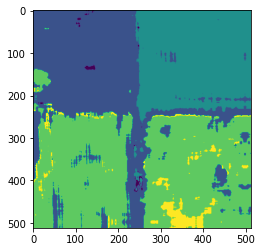

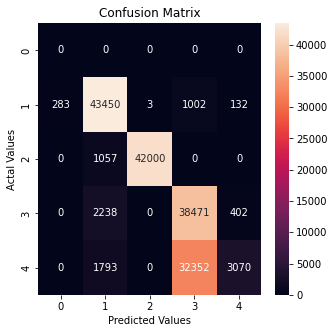

In [172]:
from itertools import combinations

f_full = np.concatenate((features1, features2), axis=2)
# Based on the plots above, i remove some of the features that are either similar or poorly seperable.
f_full = np.delete(f_full, [1, 5, 1, 12, 8], axis=2)
'''
# Here i attempt to find some good combinations of the features for training the gaussian classifier.
current_best_model = None
current_best_acc = 0.0
current_best_indecies = None
A = [i for i in range(1, f_full.shape[2])]
for i in range(3, 5): # Run for up to 3 different feature combinations
    for j in combinations(A, i):
        print(j)
        model = bayesianModel()
        model.fit(f_full[:, :, j], mask)
        cont = True
        for cov in model.cov_mats:
            if (np.linalg.eigh(cov)[0] <= 0).all() == True:
                cont = False
        if cont:
            preds = model.predict(f_full[:,:,j])
            train_acc = model.accuracy
            if train_acc > current_best_acc:
                current_best_model = model
                current_best_acc = train_acc
                current_best_indecies = j
                print('New best accuracy: %f'%(current_best_acc))
                print('New best accuracy: %s'%(current_best_indecies, ))
            print(train_acc)
            plt.figure()
            plt.imshow(preds)
            plt.show()
'''
# Running the loop above gives the following model with the highest accuracy
model = bayesianModel()
zero_p = 0.1e-3
model.c_priors = [zero_p, 0.25-(zero_p/4), 0.25-(zero_p/4), 0.25-(zero_p/4), 0.25-(zero_p/4)] 
model.fit(f_full[:, :, (1, 4)], mask)
preds = model.predict(f_full[:,:,(1, 4)])
print(model.accuracy)
plt.figure()
plt.imshow(preds)
model.plot_confusion_mat()


From the confusion matrix, we can clearly see in (4, 4) than almost none of the pixels beloging to texture 4 are actually classified as being 4. It is instead incorrectly classified as mostly 3, and some of them are also classified as 1. Looking at texture 1, we can also see that some of the texture 1 pixels are incorrectly classified as a 0 or 3.

I attempted to improve these result by combining several gaussian models that were good at capturing individual textures, and then make an overal classifier that classifies a pixel based on the most confident gaussian classifier. Doing this i managed to increase the overall accuracy to 96.7% using two different gaussian classifiers. This is done with the oneVsRest class as shown below.

0.9678020847744101


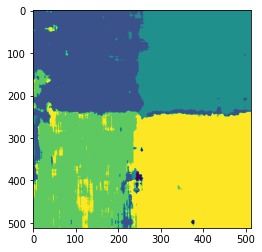

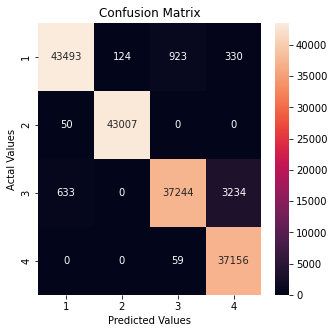

In [174]:
# Training a set of gaussian classifiers on the good features found in the earlier loop
# These gaussian classifiers can then be used in conjunction to find the most probable class
feat = [f_full[:,:,(1, 3, 9)],
        f_full[:,:,(4, 5, 6)]
       ]
gaus_models = []

for i in range(len(feat)):
    model = bayesianModel()
    model.fit(feat[i], mask)
    model.predict(feat[i])
    gaus_models.append(model)
    
classifier = oneVsRest(np.array(gaus_models))
preds = classifier.predict()

plt.figure()
plt.imshow(preds)

print(classifier.accuracy)
classifier.plot_confusion_mat()

Doing this I manage to include the 4th texture with a good accuracy. Looking at the confusion matrix, we see that the accuracy for texture 3 is slightly higher but are more frequently incorrectly classified as texture 4. The accuracy for class 1 and 2 are imporved a bit as well compared to the single gaussian classifier confusion matrix. Compared to the single gaussian classifier, we also see that none of the pixels are predicted as 0. Overall this manages to increase the accuracy up to 96.7%

## 6. Evaluation of classification performance on the test data set using the set of features selected in point 3. 

Now compute the overall classification accuracy and the confusion matrix on the two test images. These images are slightly different from the training image. Include the results and some discussion below. 

Compute the accuracy both on mosaic2_test.mat and mosaic3_test.mat using the corresponding test masks mask_mosaic2_test.mat and mask_mosaic3_test.mat. Compare the performance, and discuss the differences in accuracy you see.

Here I use the one vs rest classifier to compare

0.9440130403661888


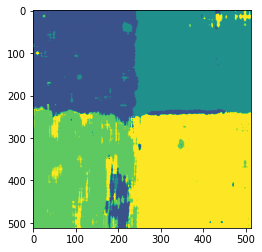

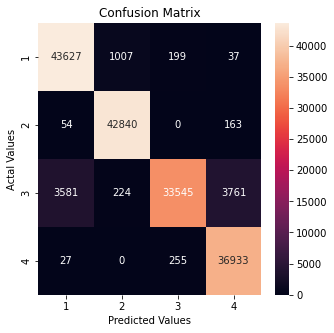

In [175]:
g2_test1 = glcm(img_test1, distance=1, angle=0.0, levels=16, window_size=29) #dx=3 best so far
g4_test1 = glcm(img_test1, distance=3, angle=45.0, levels=16, window_size=29)

features1_test1 = compute_Q(g2_test1)
features2_test1 = compute_Q(g4_test1)

f_full_test1 = np.concatenate((features1_test1, features2_test1), axis=2)
f_full_test1 = np.delete(f_full_test1, [1, 5, 1, 12, 8], axis=2)

feat_test1 = [f_full_test1[:,:,(1, 3, 9)],
              f_full_test1[:,:,(4, 5, 6)] 
             ]

for i in range(len(feat_test1)):
    gaus_models[i].predict(feat_test1[i])

classifier_test1 = oneVsRest(np.array(gaus_models))
preds_test1 = classifier_test1.predict()

plt.figure()
plt.imshow(preds_test1)

print(classifier_test1.accuracy)
classifier_test1.plot_confusion_mat()

For mosaic_test1 the accuracy is 94.4% which is a bit lower than for the training image.
In perticular, texture 3 contributes the most to the lower accuracy where we see more of these pixels be predicted incorrectly as class 4 and 1.

0.5309618473050111


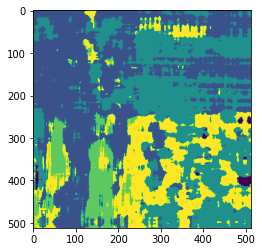

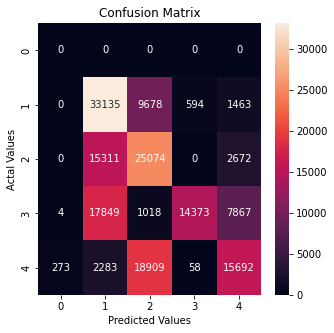

In [176]:
g2_test2 = glcm(img_test2, distance=1, angle=0.0, levels=16, window_size=29) #dx=3 best so far
g4_test2 = glcm(img_test2, distance=3, angle=45.0, levels=16, window_size=29)

features1_test2 = compute_Q(g2_test2)
features2_test2 = compute_Q(g4_test2)

f_full_test2 = np.concatenate((features1_test2, features2_test2), axis=2)
f_full_test2 = np.delete(f_full_test2, [1, 5, 1, 12, 8], axis=2)

feat_test2 = [f_full_test2[:,:,(1, 3, 9)],
              f_full_test2[:,:,(4, 5, 6)] 
             ]

for i in range(len(feat_test2)):
    gaus_models[i].predict(feat_test2[i])

classifier_test2 = oneVsRest(np.array(gaus_models))
preds_test2 = classifier_test2.predict()

plt.figure()
plt.imshow(preds_test2)

print(classifier_test2.accuracy)
classifier_test2.plot_confusion_mat()

For mosaic_test2 the accuracy decreases quite a bit to 53% and is a lot worse than the other two, this is also reflected in the confusion matrix where we see that the values are less consentrated along the diagonal as the classes are frequently incorrectly classified.